In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyvi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.5 MB 7.2 MB/s 
     |████████████████████████████████| 965 kB 61.9 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pyvi import ViTokenizer

# Preprocessing

In [ ]:
data = pd.read_json('/content/drive/MyDrive/Colab Notebooks/DL-project-sentiment-analysis/data/data_coment_tiki.json')

In [ ]:
data.head(5)

,content,rating
0,"Giao hàng cực nhanh, sáng hôm nay đặt,sáng mai...",5
1,"Đóng gói cẩn thận, điện thoại còn nguyên seal,...",5
2,Mình cho 1 sao vì thái độ dịch vụ Khách hàng t...,1
3,"Sản phẩm tầm giá nhìn cũng đx , mình mua cho p...",3
4,"Màu xanh ở ngoài nhìn đẹp sang, thích hơ...",5


In [ ]:
data = data.rename(columns={"content": "comment"})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16115 entries, 0 to 16114
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  16115 non-null  object
 1   rating   16115 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.9+ KB


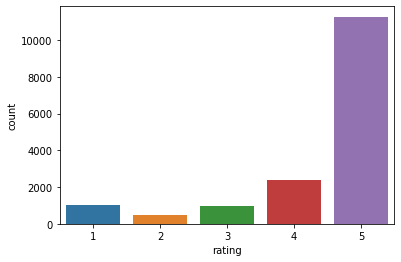

In [ ]:
sns.countplot(data=data, x='rating');

In [ ]:
# # Xóa dữ liệu để đưa về phân bố data về cân hơn
# np.random.seed(10)
# remove_n = 2000
# drop_indices = np.random.choice(data[data['rating'] == 5].index, remove_n, replace=False)
# scaled_data = data.drop(drop_indices)

In [ ]:
# remove_n = 1000
# drop_indices = np.random.choice(scaled_data[scaled_data['rating'] == 4].index, remove_n, replace=False)
# scaled_data = scaled_data.drop(drop_indices)

In [ ]:
data_lazada = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL-project-sentiment-analysis/data/data_all_processed.csv')

In [ ]:
data_lazada.head()

,stars,comment
0,3,ok
1,1,máy mới sạc chưa sài mà đã hết pin cảm_ứng rất...
2,5,máy bền_bé làm rơi nhiều lần mà không bị hỏng
3,3,nhưng khi chơi game nhẹ thì ok game nặng giật ...
4,3,tôi dùng con này hơn năm rồi rớt mấy lần mà bâ...


In [ ]:
data_lazada = data_lazada.rename(columns={"stars": "rating"})

In [ ]:
data_lazada.info

<bound method DataFrame.info of        rating                                            comment
0           3                                                 ok
1           1  máy mới sạc chưa sài mà đã hết pin cảm_ứng rất...
2           5      máy bền_bé làm rơi nhiều lần mà không bị hỏng
3           3  nhưng khi chơi game nhẹ thì ok game nặng giật ...
4           3  tôi dùng con này hơn năm rồi rớt mấy lần mà bâ...
...       ...                                                ...
32099       5                                           thảm đẹp
32100       5                                        mẫu rất đẹp
32101       5                                       quá hài_lòng
32102       5  đóng_gói hàng tốt rất tỉ_mỉ không lo bị hư_hao...
32103       5                                 hài_lòng tranh đẹp

[32104 rows x 2 columns]>

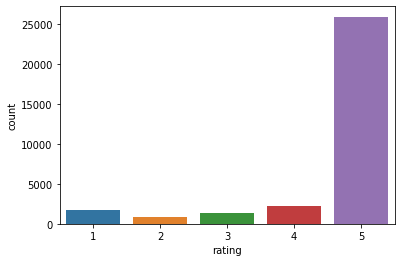

In [ ]:
sns.countplot(data=data_lazada, x='rating')

In [ ]:
data = data.append(data_lazada)

In [ ]:
data.info

<bound method DataFrame.info of                                                  comment  rating
0      Giao hàng cực nhanh, sáng hôm nay đặt,sáng mai...       5
1      Đóng gói cẩn thận, điện thoại còn nguyên seal,...       5
2      Mình cho 1 sao vì thái độ dịch vụ Khách hàng t...       1
3      Sản phẩm tầm giá nhìn cũng đx , mình mua cho p...       3
4      Màu xanh ở ngoài nhìn đẹp sang, thích hơ...       5
...                                                  ...     ...
32099                                           thảm đẹp       5
32100                                        mẫu rất đẹp       5
32101                                       quá hài_lòng       5
32102  đóng_gói hàng tốt rất tỉ_mỉ không lo bị hư_hao...       5
32103                                 hài_lòng tranh đẹp       5

[48219 rows x 2 columns]>

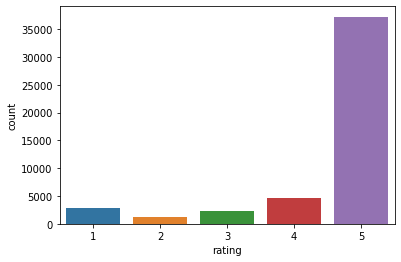

In [ ]:
sns.countplot(data=data, x='rating')

In [ ]:
np.random.seed(10)
remove_n = 25000
drop_indices = np.random.choice(data[data['rating'] == 5].index, remove_n, replace=False)
scaled_data = data.drop(drop_indices)

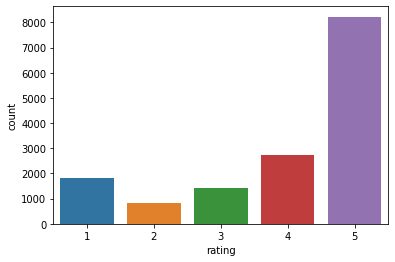

In [ ]:
sns.countplot(data=scaled_data, x='rating')

In [ ]:
# def len_str(s):
#     return len(s.split())

# cmt_len = [len_str(x) for x in scaled_data['comment']]
# scaled_data['cmt_len'] = cmt_len

In [ ]:
import re
def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)
 
txt = "<p class=\"par\">This is an example</p>"
remove_html(txt)

'This is an example'

In [ ]:
# Chuẩn hóa unicode sang chuẩn unicode dựng sẵn
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic


dicchar = loaddicchar()


def covert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [ ]:
re.sub(r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ', lambda x: dicchar[x.group()], txt)

'<p class="par">This is an example</p>'

In [ ]:
def standardize_data(row):
    # Xóa dấu chấm, phẩy, hỏi ở cuối câu
    row = re.sub(r"[\.,\?]+$-", "", row)

    # Xóa tất cả dấu chấm, phẩy, chấm phẩy, chấm thang, dấu gạch dưới ... trong câu
    row = row.replace(",", " ").replace(".", " ") \
        .replace(";", " ").replace("“", " ") \
        .replace(":", " ").replace("”", " ") \
        .replace('"', " ").replace("'", " ") \
        .replace("!", " ").replace("?", " ") \
        .replace("-", " ").replace("?", " ").replace("_", " ")
    
    # Xóa các kí tự đặc biệt
    row = re.sub("\W",' ', row) 

    # Xóa các đường link
    row = re.sub('https?://\S+|www\.\S+', ' ', row)

    # Xóa các số
    row = re.sub('\w*\d\w*', '', row)

    #Xóa các kí tự xuống dòng
    row = " ".join(re.sub("\n", " ", row).split())

    row = row.strip().lower()
    
    return row

In [ ]:
def remove_loop_char(text):
  text = re.sub(r'([A-Z])\1+', lambda m: m.group(1).upper(), str(text), flags=re.IGNORECASE)
  text = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',text)
  return text

In [ ]:
# def sementation(text):
#   return ViTokenizer.tokenize(text)

In [ ]:
"""**Tiền xử lý dữ liệu**"""
# Làm sạch dữ liệu
def text_prosessing(text):
    # Chuyển đổi thành chữ thường
    # text = text.lower() 

    # # Xóa các đoạn mã HTML
    # text = remove_html(text)

    # chuyển unicode tổ hợp sang chuẩn unicode dựng sẵn
    text = covert_unicode(text)

    # Thay thế từ viết tắt
    # text = replace_acronyms(text)

    # Xóa từ dừng
    # text = remove_stop_word(text)

    # Chuẩn hóa câu
    text = standardize_data(text)

    # Xử lý các từ viết trùng lắp
    text = remove_loop_char(text)

    # tách từ
    # text = sementation(text)

    return text

In [ ]:
# Apply vào data
scaled_data['comment'] = scaled_data['comment'].apply(text_prosessing)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
scaled_data['rating'] = scaled_data["rating"].map({1:-1, 2:-1, 3:0, 4:1, 5:1})
X = scaled_data['comment']
y = scaled_data['rating']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# _data = scaled_data.copy()
# _data["rating"] = _data["rating"].map({1:-1, 2:-1, 3:0, 4:1, 5:1})
# _data.to_csv("/content/drive/MyDrive/Colab Notebooks/ML-project/processed_data.csv")

In [ ]:
data_val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sentiment analysis/data/processed_data.csv')

In [ ]:
data_val.drop("Unnamed: 0", inplace = True, axis = 1)
data_val.head()

,comment,rating
0,mình cho sao vì thái độ dịch vụ khách hàng tại...,-1
1,sản phẩm tầm giá nhìn cũng đx mình mua cho pa ...,0
2,màu xanh ở ngoài nhìn đẹp sang thích hợp cho n...,1
3,sản phẩm mình mua được giao nhanh nhận hàng kh...,-1
4,đóng gói cẩn thận giao đúng lúc giờ đúng sản p...,1


In [ ]:
X = data_val.comment.fillna(' ')

# Build SVM model and Train

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import math

In [ ]:
# cv = CountVectorizer()
# X_vectors = cv.fit_transform(X)

In [ ]:
# print(X_vectors.shape)

In [ ]:
# print(len(cv.get_feature_names()))
# print(X_vectors.todense().shape)
# print(X_vectors.todense()[0].shape)
# print(len(X))

In [ ]:
# X_vectors = X_vectors.todense()

In [ ]:
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(X, data_val['rating'], test_size=0.1, random_state=0)

In [ ]:
print (x_train_data)

13843         hang re chat luong nhưng phai tranh nuoc nhe
10920    sản phẩm chất lượng tốt mặc thoải mái rộng rãi...
8317     đàn rất đẹp màu sắc tưới sáng ânhs sáng của đè...
13158                         giá rẻ bé nhà mình rất thích
9685                                         chất lượg tốt
                               ...                        
13123                                      cảm ơn cửa hàng
3264     điện thoại rất rất chậm chỉ chạy các ứng dụng ...
9845     tã chưa xài nên chưa biết chất lượng thế nào n...
10799                                         rất hài lòng
2732     vừa mua xong giá chưa dùng nhưng thấy chắc chắ...
Name: comment, Length: 13547, dtype: object


In [ ]:
vectorizer = TfidfVectorizer(max_features=100000, ngram_range=(1,4), sublinear_tf=True)
vectorizer.fit(x_train_data)
x_train_tfidf = vectorizer.transform(x_train_data)

In [ ]:
vectorizer.inverse_transform(x_train_tfidf)

[array(['tranh', 're', 'phai tranh nuoc nhe', 'phai tranh nuoc',
        'phai tranh', 'phai', 'nuoc nhe', 'nuoc', 'nhưng', 'nhe', 'luong',
        'hang', 'chat luong', 'chat'], dtype='<U36'),
 array(['được', 'tốt mặc', 'tốt giá', 'tốt', 'tạm được', 'tạm',
        'thun co giãn tốt', 'thun co giãn', 'thun co', 'thun',
        'thoải mái rộng rãi', 'thoải mái rộng', 'thoải mái', 'thoải',
        'sản phẩm chất lượng', 'sản phẩm chất', 'sản phẩm', 'sản',
        'rộng rãi', 'rộng', 'rãi', 'phẩm chất lượng tốt',
        'phẩm chất lượng', 'phẩm chất', 'phẩm', 'mặc thoải mái',
        'mặc thoải', 'mặc', 'mái', 'lượng tốt', 'lượng',
        'lưng thun co giãn', 'lưng thun co', 'lưng thun', 'lưng',
        'giãn tốt', 'giãn', 'giá tạm', 'giá', 'co giãn tốt', 'co giãn',
        'co', 'chất lượng tốt', 'chất lượng', 'chất'], dtype='<U36'),
 array(['đẹp màu sắc', 'đẹp màu', 'đẹp', 'đèn không', 'đèn', 'đàn',
        'với giá không', 'với giá', 'với', 'thước hơi nhỏ', 'thước hơi',
        'thướ

In [ ]:
q = vectorizer.get_feature_names_out()
print(q.shape)

(100000,)


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn import svm
# parameters = {'kernel': ('rbf', 'linear', 'sigmoid'), 'C':[1,10]}
# clf = GridSearchCV(svm.SVC(), param_grid=parameters)
# clf.fit(x_train_tfidf, y_train_data)
# print('best clf score: ', clf.best_score_)
# print('best_params', clf.best_params_)

### Model Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

lr_model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
lr_model.fit(x_train_tfidf, y_train_data)
vector_x_test = vectorizer.transform(x_test_data)
y_predict = lr_model.predict(vector_x_test)
print(classification_report(y_test_data, lr_model.predict(vector_x_test), digits = 4))

              precision    recall  f1-score   support

          -1     0.6464    0.6464    0.6464       263
           0     0.4000    0.0288    0.0537       139
           1     0.8491    0.9484    0.8960      1104

    accuracy                         0.8108      1506
   macro avg     0.6318    0.5412    0.5320      1506
weighted avg     0.7723    0.8108    0.7747      1506



In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
total_accuracy = cross_val_score(model, x_train_tfidf, y_train_data, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(total_accuracy))
model.fit(x_train_tfidf,y_train_data)

from sklearn.metrics import classification_report
vector_x_test = vectorizer.transform(x_test_data)
print(classification_report(y_test_data, model.predict(vector_x_test), digits = 4))

Accuracy: 0.7231853684858857
              precision    recall  f1-score   support

          -1     0.4677    0.4677    0.4677       263
           0     0.1864    0.1583    0.1712       139
           1     0.8347    0.8505    0.8425      1104

    accuracy                         0.7198      1506
   macro avg     0.4963    0.4922    0.4938      1506
weighted avg     0.7107    0.7198    0.7151      1506



In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
total_accuracy = cross_val_score(model, x_train_tfidf, y_train_data, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(total_accuracy))
model.fit(x_train_tfidf,y_train_data)

from sklearn.metrics import classification_report
vector_x_test = vectorizer.transform(x_test_data)
print(classification_report(y_test_data, model.predict(vector_x_test), digits = 4))

Accuracy: 0.7352920143677065
              precision    recall  f1-score   support

          -1     0.7500    0.0570    0.1060       263
           0     0.0000    0.0000    0.0000       139
           1     0.7409    0.9973    0.8502      1104

    accuracy                         0.7410      1506
   macro avg     0.4970    0.3514    0.3187      1506
weighted avg     0.6741    0.7410    0.6418      1506



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=None, random_state=0)
rfc.fit(x_train_tfidf, y_train_data)
vector_x_test = vectorizer.transform(x_test_data)
print(classification_report(y_test_data, rfc.predict(vector_x_test), digits = 4))
# total_accuracy = cross_val_score(model, x_train_tfidf, y_train_data, cv=10, scoring='accuracy')
# print('Accuracy:', np.mean(total_accuracy))
# model.fit(x_train_tfidf,y_train_data)

# from sklearn.metrics import classification_report
# vector_x_test = vectorizer.transform(x_test_data)
# print(classification_report(y_test_data, model.predict(vector_x_test), digits = 4))

              precision    recall  f1-score   support

          -1     0.6980    0.3954    0.5049       263
           0     0.2500    0.0072    0.0140       139
           1     0.7953    0.9746    0.8759      1104

    accuracy                         0.7842      1506
   macro avg     0.5811    0.4591    0.4649      1506
weighted avg     0.7280    0.7842    0.7315      1506



In [ ]:
# from sklearn.svm import SVC

# model = SVC()
# total_accuracy = cross_val_score(model, x_train_tfidf, y_train_data, cv=10, scoring='accuracy')
# print('Accuracy:', np.mean(total_accuracy))

In [ ]:
from sklearn import svm
model = svm.SVC(C=1, kernel='sigmoid')
model.fit(x_train_tfidf,y_train_data)

SVC(C=1, kernel='sigmoid')

In [ ]:
# print(model.score(vector_x_test, y_test_data))

In [ ]:
from sklearn.metrics import classification_report
vector_x_test = vectorizer.transform(x_test_data)
print(classification_report(y_test_data, model.predict(vector_x_test)))

              precision    recall  f1-score   support

          -1       0.63      0.70      0.66       514
           0       0.71      0.02      0.04       276
           1       0.87      0.95      0.90      2221

    accuracy                           0.82      3011
   macro avg       0.74      0.56      0.53      3011
weighted avg       0.81      0.82      0.78      3011



In [ ]:
from sklearn.svm import SVC

svc_model = SVC(decision_function_shape = 'ovo', verbose=10)
# , class_weight = {0:3, 1:0, 2:5}
svc_model.fit(x_train_tfidf,y_train_data)
vector_x_test = vectorizer.transform(x_test_data)
y_predict = svc_model.predict(vector_x_test)
clf_report = classification_report(y_test_data, svc_model.predict(vector_x_test))
print(clf_report)
# sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

[LibSVM]              precision    recall  f1-score   support

          -1       0.67      0.58      0.62       514
           0       0.67      0.01      0.01       276
           1       0.84      0.96      0.90      2221

    accuracy                           0.81      3011
   macro avg       0.72      0.52      0.51      3011
weighted avg       0.79      0.81      0.77      3011



In [ ]:
from sklearn.svm import SVC

svc_model = SVC(decision_function_shape = 'ovo', verbose=10)
# , class_weight = {0:3, 1:0, 2:5}
svc_model.fit(x_train_tfidf,y_train_data)
vector_x_test = vectorizer.transform(x_test_data)
y_predict = svc_model.predict(vector_x_test)
clf_report = classification_report(y_test_data, svc_model.predict(vector_x_test), digits=4)
print(clf_report)
# sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

[LibSVM]              precision    recall  f1-score   support

          -1     0.6500    0.5932    0.6203       263
           0     0.5000    0.0072    0.0142       139
           1     0.8386    0.9601    0.8953      1104

    accuracy                         0.8081      1506
   macro avg     0.6629    0.5202    0.5099      1506
weighted avg     0.7744    0.8081    0.7659      1506



[LibSVM]{'Tiêu cực': {'precision': 0.6674157303370787, 'recall': 0.5778210116731517, 'f1-score': 0.6193952033368091, 'support': 514}, 'Trung tính': {'precision': 0.8357393679282091, 'recall': 0.9644304367402071, 'f1-score': 0.8954849498327759, 'support': 2221}, 'Tích cực': {'precision': 0.8357393679282091, 'recall': 0.9644304367402071, 'f1-score': 0.8954849498327759, 'support': 2221}, 'micro avg': {'precision': 0.8222940226171244, 'recall': 0.9243341404358354, 'f1-score': 0.8703334283271588, 'support': 4956}, 'macro avg': {'precision': 0.7796314887311656, 'recall': 0.8355606283845219, 'f1-score': 0.8034550343341204, 'support': 4956}, 'weighted avg': {'precision': 0.8182820737954728, 'recall': 0.9243341404358354, 'f1-score': 0.8668509446473588, 'support': 4956}}


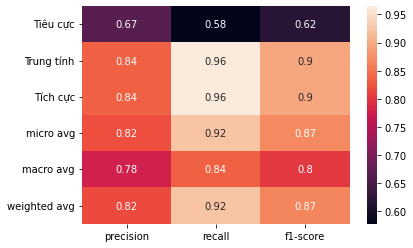

In [ ]:
from sklearn.svm import SVC

svc_model = SVC(decision_function_shape = 'ovo', verbose=10)
# , class_weight = {0:3, 1:0, 2:5}
svc_model.fit(x_train_tfidf,y_train_data)
vector_x_test = vectorizer.transform(x_test_data)
y_predict = svc_model.predict(vector_x_test)
clf_report = classification_report(y_test_data, y_predict, labels= [-1,1,1],
                                   target_names=['Tiêu cực', 'Trung tính', 'Tích cực'], output_dict=True)
print(clf_report)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold

model_ltb = lgb.LGBMClassifier()
model_ltb.fit(x_train_tfidf, y_train_data)
vector_x_test = vectorizer.transform(x_test_data)
y_predict = model_ltb.predict(vector_x_test)
clf_report = classification_report(y_test_data, model_ltb.predict(vector_x_test), digits=4)
print(clf_report)
# sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

              precision    recall  f1-score   support

          -1     0.6475    0.6844    0.6654       263
           0     0.1714    0.0432    0.0690       139
           1     0.8617    0.9312    0.8951      1104

    accuracy                         0.8061      1506
   macro avg     0.5602    0.5529    0.5432      1506
weighted avg     0.7606    0.8061    0.7787      1506



In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier()
model_xgb.fit(x_train_tfidf, y_train_data)
vector_x_test = vectorizer.transform(x_test_data)
y_predict = model_xgb.predict(vector_x_test)
clf_report = classification_report(y_test_data, model_xgb.predict(vector_x_test), digits=4)
print(clf_report)

              precision    recall  f1-score   support

          -1     0.6256    0.5399    0.5796       263
           0     0.4167    0.0360    0.0662       139
           1     0.8232    0.9447    0.8798      1104

    accuracy                         0.7902      1506
   macro avg     0.6218    0.5069    0.5085      1506
weighted avg     0.7512    0.7902    0.7523      1506

